<a href="https://colab.research.google.com/github/Petronela7/FinalProject/blob/master/FER3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import csv
import numpy

train_images = []
train_labels = []

categories_count = {}

with open('/content/drive/MyDrive/data/fer2013/fer2013.csv') as train:

    # Read train.csv file
    csv_reader = csv.reader(train)
    next(csv_reader)  # Skip the header

    for row in csv_reader:

        # Append image
        pixels_str = row[1]
        pixels_list = [int(i) for i in pixels_str.split(' ')]
        pixels_list = numpy.array(pixels_list, dtype='uint8')
        image = pixels_list.reshape((48, 48))
        train_images.append(image)

        label_str = row[0]

        # Calculate categories count
        count = 0
        if label_str in categories_count:
            count = categories_count[label_str] + 1
        categories_count[label_str] = count

        # Append label
        label = int(label_str)
        train_labels.append(label)

# Create numpy array of train images and labels
x_train = numpy.array(train_images)
y_train = numpy.array(train_labels)

print('x_train shape: {0}'.format(x_train.shape))
print('y_train shape: {0}'.format(y_train.shape))

x_train shape: (35887, 48, 48)
y_train shape: (35887,)


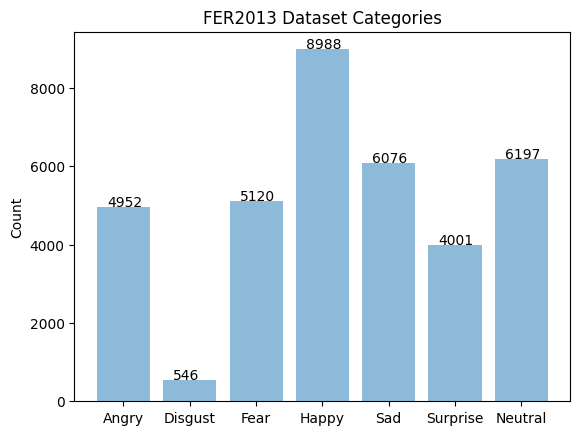

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

categories = ('Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral')
y_pos = numpy.arange(len(categories))

counts = []
for label in range(len(categories)):
    label_str = str(label)
    count = categories_count[label_str]
    counts.append(count)
    plt.text(label - 0.25, count + 15, str(count))

# Draw histogram
plt.bar(y_pos, counts, align='center', alpha=0.5)
plt.xticks(y_pos, categories)
plt.ylabel('Count')
plt.title('FER2013 Dataset Categories')

plt.show()

Label is: 0


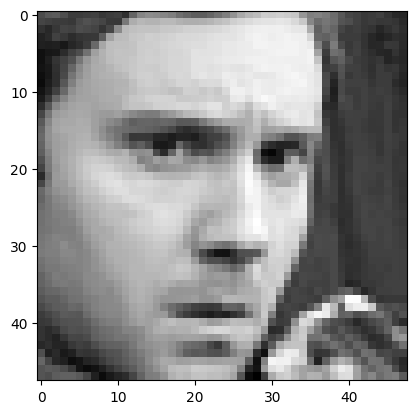

In [ ]:
image = x_train[0]
label = y_train[0]

print('Label is: ' + str(label))
plt.imshow(image, cmap='gray')

In [ ]:
from sklearn.model_selection import train_test_split

# Split dataset into train set and test set
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2)
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train.reshape(len(x_train), 48, 48, 1)
x_test = x_test.reshape(len(x_test), 48, 48, 1)

print(x_train.shape)
print(x_test.shape)

(28709, 48, 48, 1)
(7178, 48, 48, 1)


In [ ]:
%tensorflow_version 2.x
import tensorflow as tf

print('Tensorflow version: {}'.format(tf.__version__))

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPool2D, Dropout, Flatten, Dense

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from tensorflow.keras import Model, Input

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if len(device_name) > 0:
    print("Found GPU at: {}".format(device_name))
else:
    device_name = "/device:CPU:0"
    print("No GPU, using {}.".format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
with tf.device(device_name):
      cnn_model = Sequential()

      # 1st convolution layer
      cnn_model.add(Conv2D(64, input_shape=(48, 48, 1), kernel_size=(3, 3), activation='relu'))
      cnn_model.add(BatchNormalization())
      cnn_model.add(Conv2D(64, padding='same', kernel_size=(3, 3), activation='relu'))
      cnn_model.add(BatchNormalization())
      cnn_model.add(MaxPool2D(pool_size=(3, 3), strides=(2, 2)))
      cnn_model.add(Dropout(0.3))

      # 2nd convolution layer
      cnn_model.add(Conv2D(128, padding='same', kernel_size=(3, 3), activation='relu'))
      cnn_model.add(BatchNormalization())
      cnn_model.add(Conv2D(128, padding='same', kernel_size=(3, 3), activation='relu'))
      cnn_model.add(BatchNormalization())
      cnn_model.add(MaxPool2D(pool_size=(3, 3), strides=(2, 2)))
      cnn_model.add(Dropout(0.3))

      # 3rd convolution layer
      cnn_model.add(Conv2D(256, padding='same', kernel_size=(3, 3), activation='relu'))
      cnn_model.add(BatchNormalization())
      cnn_model.add(Conv2D(256, padding='same', kernel_size=(3, 3), activation='relu'))
      cnn_model.add(BatchNormalization())
      cnn_model.add(MaxPool2D(pool_size=(3, 3), strides=(2, 2)))
      cnn_model.add(Dropout(0.3))

      # 4th convolution layer
      cnn_model.add(Conv2D(512, padding='same', kernel_size=(3, 3), activation='relu'))
      cnn_model.add(BatchNormalization())
      cnn_model.add(Conv2D(512, padding='same', kernel_size=(3, 3), activation='relu'))
      cnn_model.add(BatchNormalization())
      cnn_model.add(MaxPool2D(pool_size=(3, 3), strides=(2, 2)))
      cnn_model.add(Dropout(0.3))

      # Fully connected layer
      cnn_model.add(Flatten())
      cnn_model.add(Dense(512, activation='relu'))
      cnn_model.add(Dropout(0.3))
      cnn_model.add(Dense(256, activation='relu'))
      cnn_model.add(Dropout(0.3))
      cnn_model.add(Dense(64, activation='relu'))
      cnn_model.add(Dropout(0.3))

      cnn_model.add(Dense(7, activation='softmax'))

      # Compile the model
      adam = Adam(learning_rate=0.001)
      cnn_model.compile(optimizer=adam,
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])

      # Summary the model
      cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 46, 46, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 46, 46, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                        

In [ ]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10)
reduce_learning_rate = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=5)

# Train the model
history = cnn_model.fit(x_train,
                        y_train,
                        batch_size=64,
                        epochs=100,
                        validation_data=(x_test, y_test),
                        callbacks=[early_stopping, reduce_learning_rate])

Epoch 1/100
449/449 [==============================] - 40s 55ms/step - loss: 1.8512 - accuracy: 0.2450 - val_loss: 1.8024 - val_accuracy: 0.2924 - lr: 0.0010
Epoch 2/100
449/449 [==============================] - 25s 57ms/step - loss: 1.6141 - accuracy: 0.3533 - val_loss: 1.6053 - val_accuracy: 0.3703 - lr: 0.0010
Epoch 3/100
449/449 [==============================] - 26s 57ms/step - loss: 1.4545 - accuracy: 0.4259 - val_loss: 1.3526 - val_accuracy: 0.4731 - lr: 0.0010
Epoch 4/100
449/449 [==============================] - 24s 53ms/step - loss: 1.3486 - accuracy: 0.4842 - val_loss: 1.2737 - val_accuracy: 0.5081 - lr: 0.0010
Epoch 5/100
449/449 [==============================] - 24s 53ms/step - loss: 1.2829 - accuracy: 0.5117 - val_loss: 1.3247 - val_accuracy: 0.4965 - lr: 0.0010
Epoch 6/100
449/449 [==============================] - 24s 54ms/step - loss: 1.2301 - accuracy: 0.5398 - val_loss: 1.2099 - val_accuracy: 0.5251 - lr: 0.0010
Epoch 7/100
449/449 [==============================]

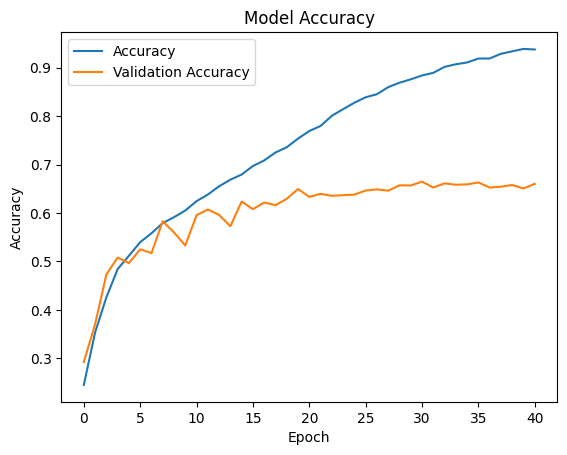

In [ ]:
# Show accuracy diagram
plt.title('Model Accuracy')
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Accuracy', 'Validation Accuracy'])
plt.show()

In [ ]:
# Evaluate the model before improvement
_, score_before_improvement = cnn_model.evaluate(x_test, y_test)
print('Score before improvement: {}'.format(score_before_improvement))

225/225 [==============================] - 2s 8ms/step - loss: 1.7948 - accuracy: 0.6602
Score before improvement: 0.6602117419242859


In [ ]:
# Generate hard data
hard_images = []
hard_labels = []

# Make predictions
predictions = cnn_model.predict(x_test)
for i, v in enumerate(predictions):
    y_predict = numpy.argmax(v)
    y_real = y_train[i]
    if y_predict != y_real:
        # If predict incorrectly, append to array
        image = x_train[i]
        hard_image = image.reshape(1, 48, 48, 1)
        hard_images.append(image)
        hard_labels.append(y_real)

x_hard = numpy.array(hard_images)
y_hard = numpy.array(hard_labels)

print(x_hard.shape)
print(y_hard.shape)

225/225 [==============================] - 2s 8ms/step
(5976, 48, 48, 1)
(5976,)


In [ ]:
# Train the model on hard data
x_hard_train, x_hard_test, y_hard_train, y_hard_test = train_test_split(x_hard, y_hard, test_size=0.2)
history = cnn_model.fit(x_hard_train,
                        y_hard_train,
                        batch_size=64,
                        epochs=100,
                        validation_data=(x_hard_test, y_hard_test),
                        callbacks=[early_stopping, reduce_learning_rate])

Epoch 1/100
75/75 [==============================] - 5s 72ms/step - loss: 0.1647 - accuracy: 0.9477 - val_loss: 0.0581 - val_accuracy: 0.9824 - lr: 6.5610e-04
Epoch 2/100
75/75 [==============================] - 4s 53ms/step - loss: 0.1244 - accuracy: 0.9619 - val_loss: 0.0519 - val_accuracy: 0.9816 - lr: 6.5610e-04
Epoch 3/100
75/75 [==============================] - 4s 55ms/step - loss: 0.1192 - accuracy: 0.9603 - val_loss: 0.0604 - val_accuracy: 0.9774 - lr: 6.5610e-04
Epoch 4/100
75/75 [==============================] - 4s 57ms/step - loss: 0.1096 - accuracy: 0.9636 - val_loss: 0.0646 - val_accuracy: 0.9749 - lr: 6.5610e-04
Epoch 5/100
75/75 [==============================] - 4s 55ms/step - loss: 0.1073 - accuracy: 0.9655 - val_loss: 0.0657 - val_accuracy: 0.9774 - lr: 6.5610e-04
Epoch 6/100
75/75 [==============================] - 4s 53ms/step - loss: 0.0912 - accuracy: 0.9724 - val_loss: 0.0522 - val_accuracy: 0.9841 - lr: 6.5610e-04
Epoch 7/100
75/75 [===========================

In [ ]:
# Perform data augmentation
data_generator = ImageDataGenerator(featurewise_center=False,
                                    featurewise_std_normalization=False,
                                    rotation_range=10,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    zoom_range=.1,
                                    horizontal_flip=True)
flow = data_generator.flow(x_train, 
                           y_train, 
                           batch_size=64)

# Train the model again to balance out
history = cnn_model.fit(flow,
                        epochs=100,
                        validation_data=(x_test, y_test),
                        callbacks=[early_stopping, reduce_learning_rate])

Epoch 1/100
449/449 [==============================] - 28s 58ms/step - loss: 1.0842 - accuracy: 0.6341 - val_loss: 0.9723 - val_accuracy: 0.6480 - lr: 5.3144e-04
Epoch 2/100
449/449 [==============================] - 27s 59ms/step - loss: 0.9804 - accuracy: 0.6586 - val_loss: 0.9436 - val_accuracy: 0.6637 - lr: 5.3144e-04
Epoch 3/100
449/449 [==============================] - 27s 61ms/step - loss: 0.9480 - accuracy: 0.6716 - val_loss: 0.9318 - val_accuracy: 0.6649 - lr: 5.3144e-04
Epoch 4/100
449/449 [==============================] - 27s 61ms/step - loss: 0.9352 - accuracy: 0.6739 - val_loss: 0.9162 - val_accuracy: 0.6716 - lr: 5.3144e-04
Epoch 5/100
449/449 [==============================] - 27s 59ms/step - loss: 0.9159 - accuracy: 0.6764 - val_loss: 0.9201 - val_accuracy: 0.6755 - lr: 5.3144e-04
Epoch 6/100
449/449 [==============================] - 27s 61ms/step - loss: 0.9010 - accuracy: 0.6826 - val_loss: 0.9251 - val_accuracy: 0.6700 - lr: 5.3144e-04
Epoch 7/100
449/449 [=======

In [ ]:
# Evaluate the model after improvement
_, score_after_improvement = cnn_model.evaluate(x_test, y_test)
print('Score after improvement: {}'.format(score_after_improvement))

225/225 [==============================] - 2s 8ms/step - loss: 0.9311 - accuracy: 0.6746
Score after improvement: 0.6745611429214478


225/225 [==============================] - 2s 7ms/step


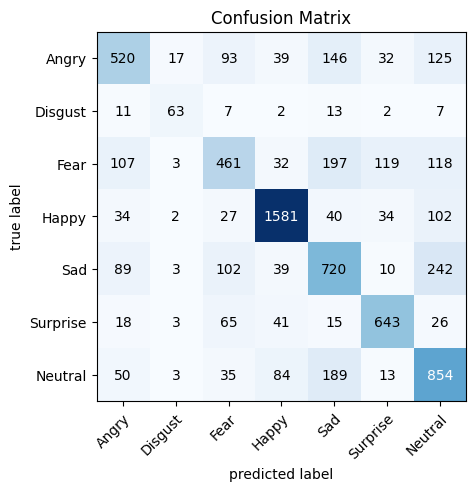

In [ ]:
!pip install -U mlxtend > /dev/null 2>&1

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

# Make predictions
predictions = cnn_model.predict(x_test)
y_predict = numpy.argmax(predictions, axis=1)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_predict)

# Display confusion matrix
class_names = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, class_names=class_names)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import os
# Download into data folder
os.chdir('/content/drive/MyDrive/data')

!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1ommGLsYSnmX8846iyQigKQfIfvpQzsF0' -O happy.jpg > /dev/null 2>&1
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1I1IjDm9Az4pkDqOz3zcQAguEJ1OsWagt' -O sad.jpg > /dev/null 2>&1
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1ZLglz_y0QklbYTcwJW1wH0YnAwBn6-1I' -O surprise.jpg > /dev/null 2>&1

In [ ]:
from tensorflow.keras.preprocessing import image

def predict_facial_expression(image_path):
    """Predict facial expression for image"""
    # Open image
    rgb_image = image.load_img(path=image_path,
                            color_mode='grayscale',
                            target_size=(48, 48))
    # Convert to array
    rgb_array = image.img_to_array(rgb_image)
    rgb_array = numpy.expand_dims(rgb_array, axis=0)

    # Show image
    rgb_display = numpy.array(rgb_array, 'float32')
    rgb_display = rgb_display.reshape([48, 48]);
    plt.imshow(rgb_display, cmap='gray')
    plt.show()

    # Make predictions
    rgb_array = rgb_array / 255.0
    prediction = cnn_model.predict(rgb_array)

    # Draw the histogram
    plt.bar(y_pos, prediction[0], align='center', alpha=0.5)
    plt.xticks(y_pos, categories)
    plt.ylabel('Percentage')
    plt.title('Facial Expression Prediction')
    plt.show()

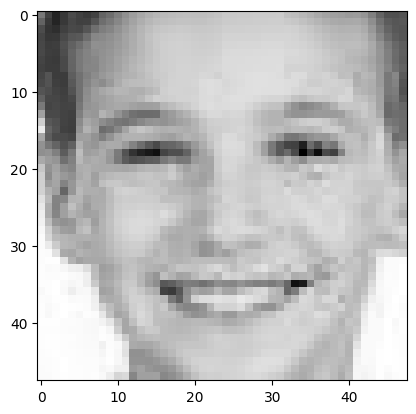

1/1 [==============================] - 0s 302ms/step


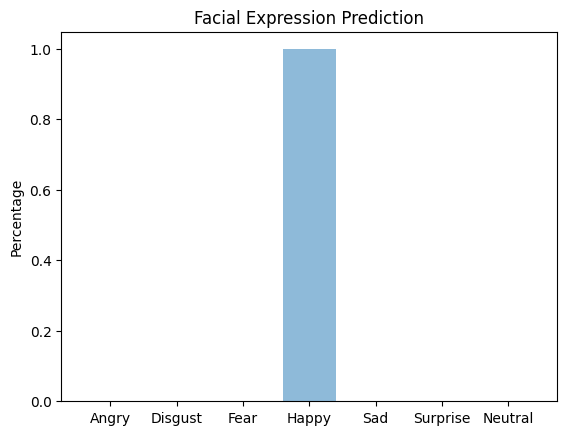

In [ ]:
# Happy
predict_facial_expression('happy.jpg')

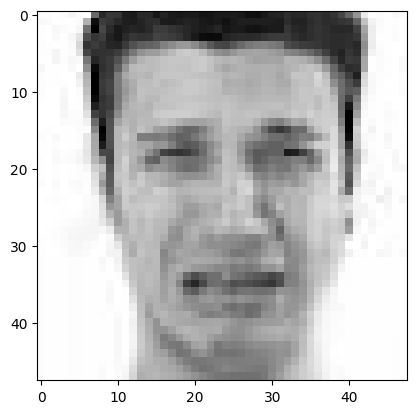

1/1 [==============================] - 0s 22ms/step


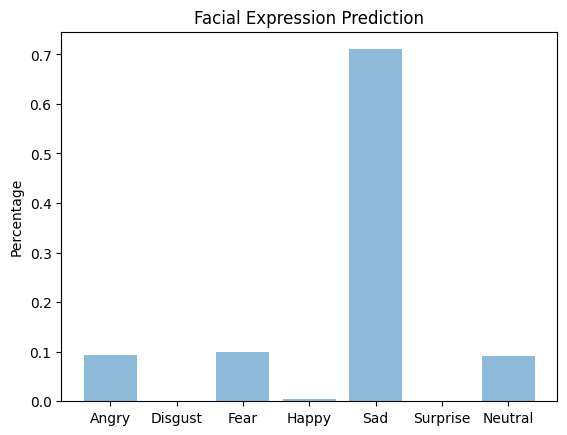

In [ ]:
# Sad
predict_facial_expression('sad.jpg')

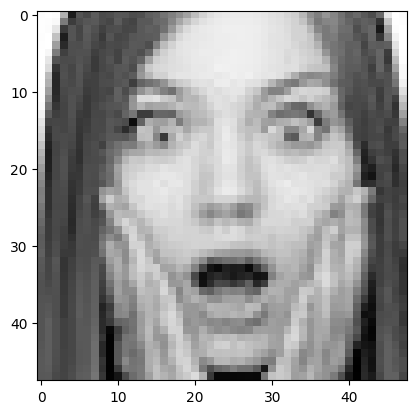

1/1 [==============================] - 0s 20ms/step


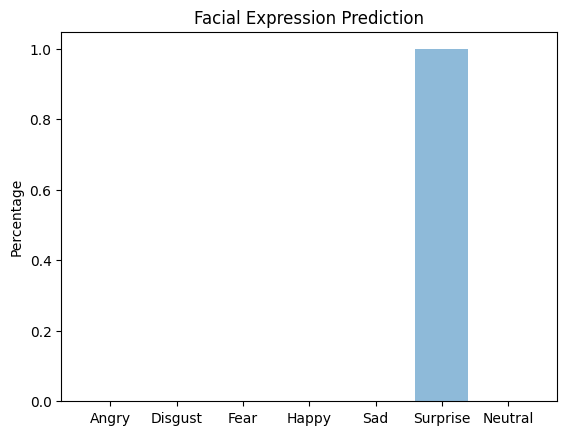

In [ ]:
# Surprise
predict_facial_expression('surprise.jpg')

In [ ]:
import os

# Create build folder
os.chdir('/content/')
!rm -rf build
!mkdir build
os.chdir('build')
!pwd

/content/build


In [ ]:
# Save tensorflow model
cnn_model.save('FER2013.h5')

In [ ]:
cnn_model.save_weights('fer.h5')

In [ ]:
fer_json=cnn_model.to_json()
with open("fer.json","w") as json_file:
  json_file.write(fer_json)

In [ ]:
# Save tensorflow lite model
converter = tf.lite.TFLiteConverter.from_keras_model(cnn_model)
tflite_model = converter.convert()
open("FER2013.tflite", "wb").write(tflite_model)

20408288